In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [18]:
len(X_train)

60000

In [19]:
len(X_test)

10000

In [20]:
X_train[0].shape

(28, 28)

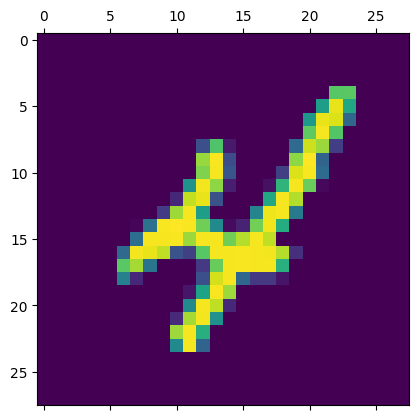

In [21]:
plt.matshow(X_train[9])

In [22]:
y_train[9]

4

In [23]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
X_train = X_train/255
X_test = X_test/255

In [26]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [27]:
X_train_flattened.shape

(60000, 784)

In [28]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, activation='sigmoid', input_shape=[
                       len(X_train_flattened[0])]),
])

In [30]:
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
model.fit(X_train_flattened, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 2s 863us/step - loss: 0.4656 - accuracy: 0.8777
Epoch 2/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3029 - accuracy: 0.9161
Epoch 3/8
1875/1875 [==============================] - 2s 843us/step - loss: 0.2832 - accuracy: 0.9201
Epoch 4/8
1875/1875 [==============================] - 1s 761us/step - loss: 0.2728 - accuracy: 0.9243
Epoch 5/8
1875/1875 [==============================] - 2s 888us/step - loss: 0.2667 - accuracy: 0.9255
Epoch 6/8
1875/1875 [==============================] - 2s 973us/step - loss: 0.2623 - accuracy: 0.9275
Epoch 7/8
1875/1875 [==============================] - 1s 790us/step - loss: 0.2582 - accuracy: 0.9286
Epoch 8/8
1875/1875 [==============================] - 1s 684us/step - loss: 0.2554 - accuracy: 0.9294


In [32]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 663us/step - loss: 0.2661 - accuracy: 0.9267


[0.266145259141922, 0.9266999959945679]

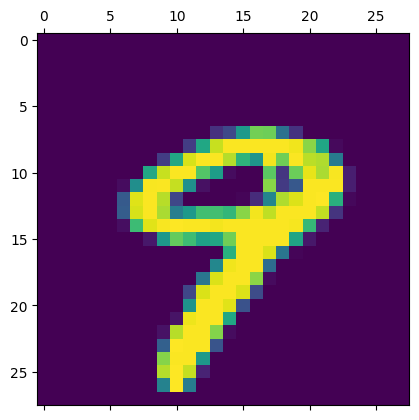

In [34]:
plt.matshow(X_test[9])

In [38]:
y_pred = model.predict(X_test_flattened)
y_pred[9]

313/313 [==============================] - 0s 602us/step


array([5.4053548e-05, 5.9959571e-09, 2.6140242e-06, 2.8377565e-04,
       8.0115396e-01, 1.3838185e-03, 2.0863120e-06, 9.2713726e-01,
       2.8767785e-01, 9.9270660e-01], dtype=float32)

In [39]:
np.argmax(y_pred[9])

9

In [40]:
y_predicted_labels = [np.argmax(i) for i in y_pred]

In [41]:
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [42]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [43]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,    9,  932,   15,    7,    3,   13,    9,   36,    3],
       [   3,    0,   19,  930,    0,   20,    2,   12,   19,    5],
       [   1,    1,    6,    2,  904,    0,   16,    9,   11,   32],
       [   9,    3,    2,   40,    7,  770,   18,    8,   30,    5],
       [  11,    3,    7,    1,    7,   10,  916,    2,    1,    0],
       [   1,    6,   24,    5,    4,    0,    0,  964,    3,   21],
       [   8,   16,    6,   20,    8,   25,   12,   13,  861,    5],
       [  11,    8,    1,   10,   24,    6,    0,   34,    7,  908]])>

Text(95.72222222222221, 0.5, 'Truth')

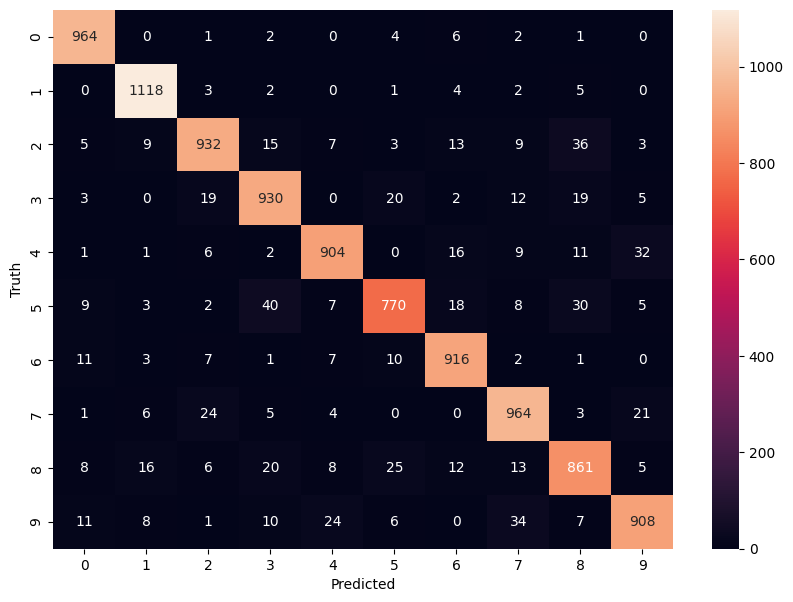

In [44]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Hidden Layer


In [45]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2760 - accuracy: 0.9219
Epoch 2/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1259 - accuracy: 0.9628
Epoch 3/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0862 - accuracy: 0.9743
Epoch 4/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0652 - accuracy: 0.9803
Epoch 5/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 6/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0409 - accuracy: 0.9877
Epoch 7/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0325 - accuracy: 0.9903
Epoch 8/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0277 - accuracy: 0.9918


In [46]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 860us/step - loss: 0.0891 - accuracy: 0.9740


[0.08914750069379807, 0.9739999771118164]

313/313 [==============================] - 0s 666us/step


Text(95.72222222222221, 0.5, 'Truth')

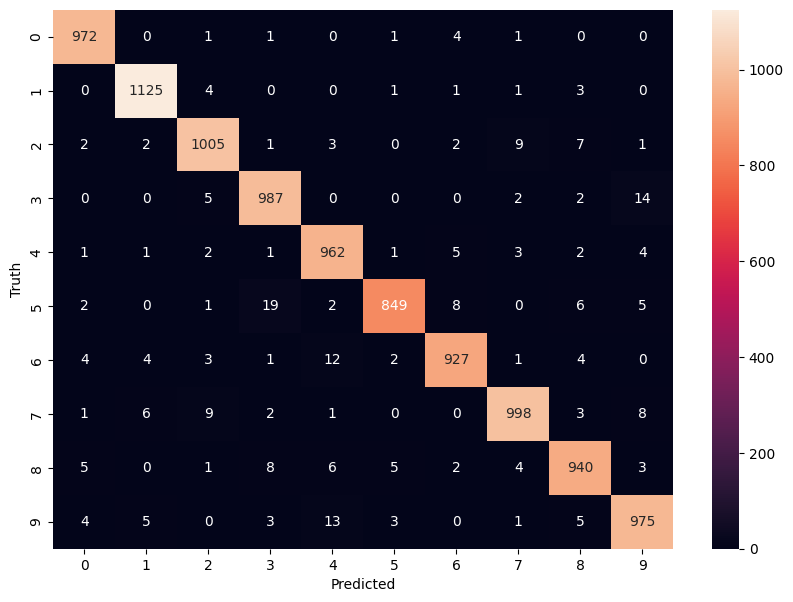

In [47]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2780 - accuracy: 0.9213
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1255 - accuracy: 0.9621
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0659 - accuracy: 0.9797
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0520 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0416 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0345 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0229 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.018

In [49]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 752us/step - loss: 0.0847 - accuracy: 0.9769


[0.08473709970712662, 0.9768999814987183]